In [1]:
%pylab inline
import calin.calib.spe_fit
import calin.math.histogram
import calin.math.optimizer

Populating the interactive namespace from numpy and matplotlib


In [2]:
karkar_data = loadtxt('../../calib/karkar_data.dat');
mes_hist = calin.math.histogram.SimpleHist(1.0)
mes_hist.insert_vec(karkar_data)
mes_model = calin.calib.spe_fit.PoissonGaussianMES(20)
like = calin.calib.spe_fit.SPELikelihood(mes_model, mes_hist)

In [3]:
opt = calin.math.optimizer.NLOptOptimizer(calin.math.optimizer.LD_LBFGS, like)

In [4]:
opt.set_scale([0.1,0.1,1.0,1.0,0.05]);
opt.set_verbosity_level(calin.math.optimizer.OptimizerVerbosityLevel_MAX);
opt.set_abs_tolerance(0.0001);
opt.set_initial_values([1.0, 3100.0, 20.0, 100.0, 0.45]);

In [5]:
status, xopt, fval = opt.minimize()

In [6]:
status

False

In [7]:
fval

325093.22432041046

In [8]:
xopt

array([  5.53490306e-01,   3.09427187e+03,   1.96141622e+01,
         8.91820138e+01,   3.23879999e-01])

In [9]:
status, err_mat = opt.calc_error_matrix()

In [10]:
print(status,sqrt(err_mat.diagonal()))

2 [ 0.00464182  0.14407549  0.106166    0.46715757  0.00690216]


In [11]:
status, err_mat, eigval, eigvec = opt.calc_error_matrix_and_eigenvectors()

In [12]:
sqrt(eigval)

array([ 0.47230912,  0.14229109,  0.08354239,  0.00468264,  0.00323051])

In [13]:
eigvec[:,4]

array([ 0.99293132,  0.00590125,  0.00242987,  0.0045693 , -0.11843051])

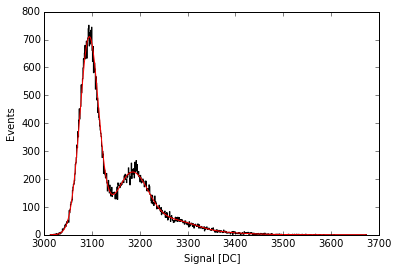

In [14]:
ihist = range(0,mes_hist.nbin());
xhist = list(map(lambda i: mes_hist.xval_center(i),ihist))
yhist = list(map(lambda i: mes_hist.weight(i),ihist))
step(xhist,yhist,'k')
xlabel('Signal [DC]')
ylabel('Events')
mes_model.set_parameter_values(xopt)
ymodel = list(map(lambda x: mes_hist.sum_w()*mes_hist.dxval()*mes_model.pdf_mes(x),xhist))
hold('on')
plot(xhist,ymodel,'r')